In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

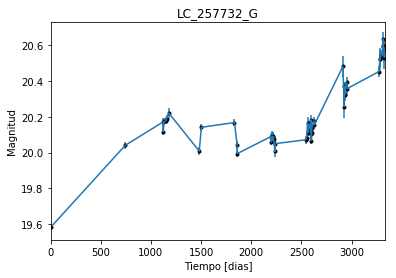

In [2]:
data = np.genfromtxt('LC_257732_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_257732_G')
plt.savefig("LC_257732_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

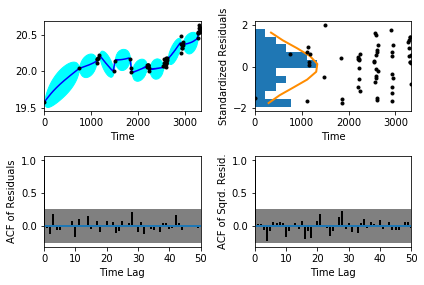

In [5]:
sample.assess_fit()

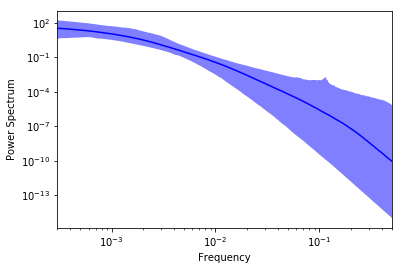

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

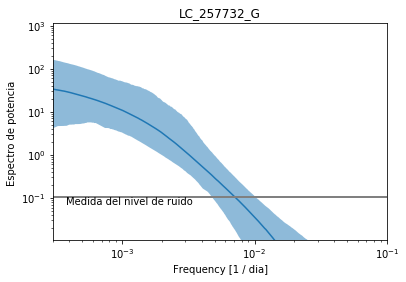

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_257732_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_257732_G')

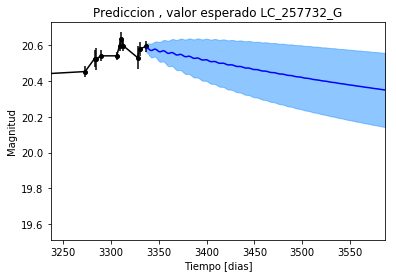

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_257732_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_257732_G')

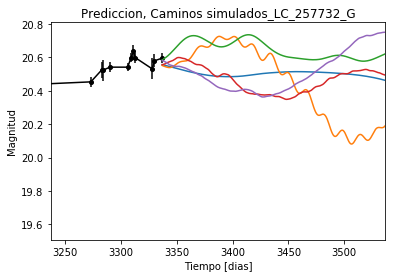

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_257732_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


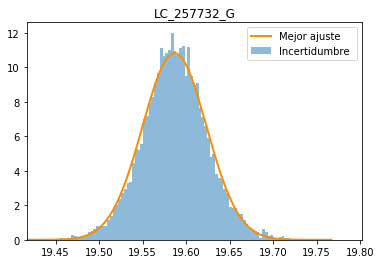

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_257732_G')
plt.savefig("Mejor_ajuste_LC_257732_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_257732_G')

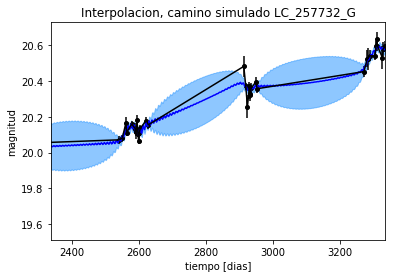

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_G')

Text(0.5,1,'Interpolacion, camino simulado LC_257732_G')

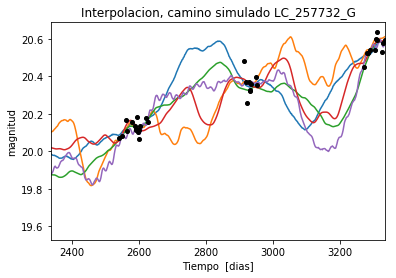

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_257732_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 760.280729669
Median: 0.0214447900167
Standard deviation: 0.205796241154
68% credibility interval: [ 0.00109404  0.24612295]
95% credibility interval: [  3.76125739e-04   7.95392794e-01]
99% credibility interval: [  3.22610178e-04   9.53785376e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 328.083789247
Median: 0.00333630606259
Standard deviation: 0.0870634804182
68% credibility interval: [ 0.00053248  0.04189413]
95% credibility interval: [ 0.00032413  0.27342983]
99% credibility interval: [  3.05683517e-04   6.24397328e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 501.386484638
Median: 0.0168836315486
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 773.338198243
Median: 104.313460197
Standard deviation: 1.82470937714
68% credibility interval: [ 102.38940317  105.73809775]
95% credibility interval: [  99.73948906  106.84723675]
99% credibility interval: [  97.51144511  107.80862934]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 618.870129403
Median: 0.802233356384
Standard deviation: 2.14202309823
68% credibility interval: [ 0.06883248  4.12022074]
95% credibility interval: [ 0.02093045  7.09573701]
99% credibility interval: [ 0.01395243  9.63862495]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 574.930326666
Median: 0.801019284981
Standard deviation: 8.17024969992
68% credibility interval: [ 0.06854305  8.9897799 ]
95% credibility interval: [  3.30026690e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6504.8862247
Median: 2.69462051562e-29
Standard deviation: 3.25976467828e+129
68% credibility interval: [  1.44436207e-66   1.61041852e-06]
95% credibility interval: [  3.38472396e-91   2.39879849e+46]
99% credibility interval: [  7.63671279e-110   3.11418823e+104]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2060.08556705
Median: 20.1008651504
Standard deviation: 0.137259731915
68% credibility interval: [ 19.98292503  20.21503373]
95% credibility interval: [ 19.82140988  20.37509556]
99% credibility interval: [ 19.6856575   20.53132185]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 604.797658864
Median: 0.0216660982501
Standard deviation: 0.239887908166
68% credibility interval: [ 0.          0.39046903]
95% credibility interval: [ 0.          0.85646724]
99% credibility interval: [ 0.          0.96421718]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 604.797658864
Median: 0.0216660982501
Standard deviation: 0.239887908166
68% credibility interval: [ 0.          0.39046903]
95% credibility interval: [ 0.          0.85646724]
99% credibility interval: [ 0.          0.96421718]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 925.160306802
Median: 0.0
Standard deviation: 0.000558372897362
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 773.338198243
Median: 104.313460197
Standard deviation: 1.82470937714
68% credibility interval: [ 102.38940317  105.73809775]
95% credibility interval: [  99.73948906  106.84723675]
99% credibility interval: [  97.51144511  107.80862934]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3634.26574319
Median: 0.0795567811441
Standard deviation: 0.0906480523147
68% credibility interval: [ 0.04805269  0.14658692]
95% credibility interval: [ 0.03258136  0.28826487]
99% credibility interval: [ 0.02740004  0.55517332]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1076.65635808
Median: 1.13788468361
Standard deviation: 0.192103350624
68% credibility interval: [ 0.96144394  1.33722115]
95% credibility interval: [ 0.82634621  1.58384011]
99% credibility interval: [ 0.74261075  1.75094191]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 375.243284123
Median: 0.000807980816298
Standard deviation: 0.0738793722886
68% credibility interval: [  3.56241688e-05   1.24192278e-02]
95% credibility interval: [  7.66173773e-51   1.35722362e-01]
99% credibility interval: [  6.91278409e-85   5.13143559e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 760.280729669
Median: (-0.134741589549+0j)
Standard deviation: 1.98590706201
68% credibility interval: [-1.54643608+0.j         -0.00687405-1.35803599j]
95% credibility interval: [ -4.99760031e+00-1.03143093j  -2.36326771e-03-0.00787233j]
99% credibility interval: [ -5.99281026e+00+0.j         -2.02701953e-03-0.0049364j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 328.083789247
Median: (-0.0209626292327+0.880563665772j)
Standard deviation: 1.60345926501
68% credibility interval: [-0.26322856+0.70591847j -0.00334567+0.11876241j]
95% credibility interval: [-1.71801030+1.71383895j -0.00203656+0.j        ]
99% credibility interval: [ -3.92320412e+00+3.90014158j  -1.92066618e-03+0.j        ]
Posterior summary for parame